In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from pandas.tseries.offsets import DateOffset
import time
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [2]:
data = pd.read_csv("full_grouped.csv")
data.rename(columns={'New cases':'New_cases'},inplace=True)
data.rename(columns={'New deaths':'New_deaths'},inplace=True)
data.rename(columns={'New recovered':'New_recovered'},inplace=True)

df = pd.DataFrame()
df['Date'] = data.loc[data['Country/Region']=='Madagascar'].Date
df['Confirmé'] = data.loc[data['Country/Region']=='Madagascar'].New_cases
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')
df = df[58:]

In [3]:
df

,Confirmé
Date,
2020-03-20,3
2020-03-21,0
2020-03-22,0
2020-03-23,9
2020-03-24,5
...,...
2020-07-14,263
2020-07-15,262
2020-07-16,484


In [4]:
train,test = df[12:],df[-12:]
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [5]:
train.shape

(109, 1)

In [6]:
n_input = 15
n_features = 1
generator = TimeseriesGenerator(train,train,length=n_input,batch_size=5)

model = Sequential()
model.add(LSTM(200,activation='relu',input_shape=(n_input,n_features)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(optimizer='adam',metrics='accuracy',loss='mse')

model.fit_generator(generator,epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
19/19 [==============================] - 1s 52ms/step - loss: 0.0361 - accuracy: 0.1383
Epoch 2/50
19/19 [==============================] - 1s 49ms/step - loss: 0.0184 - accuracy: 0.1489
Epoch 3/50
19/19 [==============================] - 1s 54ms/step - loss: 0.0106 - accuracy: 0.1489
Epoch 4/50
19/19 [==============================] - 1s 56ms/step - loss: 0.0125 - accuracy: 0.1489
Epoch 5/50
19/19 [==============================] - 1s 49ms/step - loss: 0.0151 - accuracy: 0.1383
Epoch 6/50
19/19 [==============================] - 1s 59ms/step - loss: 0.0098 - accuracy: 0.1489
Epoch 7/50
19/19 [==============================] - 1s 51ms/step - loss: 0.0125 - accuracy: 0.1489
Epoch 8/50
19/19 [==============================] - 1s 48ms/step - loss: 0.0153 - accuracy: 0.1383
Epoch 9/50
19/19 [==============================] - 1s 53ms/step - loss: 0.0095 - accuracy: 0.1489
Epoch 10/50
19/19 [==============

In [7]:
pred_list = []
batch = train[-n_input:].reshape((1,n_input,n_features))
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [8]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),index=df[-n_input:].index,columns=['Predictions'])
df_test = pd.concat([df,df_predict],axis=1)

In [9]:
df_test.tail(15)

,Confirmé,Predictions
Date,,
2020-07-04,216,367.197132
2020-07-05,213,374.083535
2020-07-06,309,381.089170
2020-07-07,222,385.634332
2020-07-08,101,391.662113
2020-07-09,209,400.779151
2020-07-10,361,407.213842
2020-07-11,435,410.409118
2020-07-12,289,411.962272


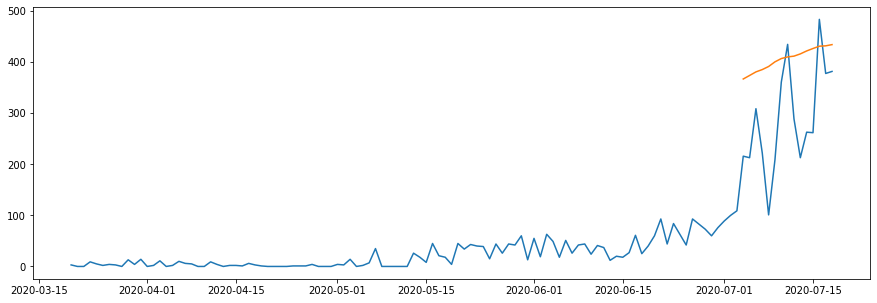

In [10]:
plt.figure(figsize=(15,5))
plt.plot(df_test.index,df_test['Confirmé'])
plt.plot(df_test.index,df_test['Predictions'])

In [11]:
train = df
scaler = MinMaxScaler()
scaler.fit(train)

train = scaler.transform(train)

n_input = 15
n_features = 1

generator = TimeseriesGenerator(train,train,length=n_input,batch_size=5)
model.fit_generator(generator,epochs=50)

pred_list = []
batch = train[-n_input:].reshape((1,n_input,n_features))
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

Epoch 1/50
22/22 [==============================] - 1s 47ms/step - loss: 0.0079 - accuracy: 0.1698
Epoch 2/50
22/22 [==============================] - 1s 52ms/step - loss: 0.0088 - accuracy: 0.1698
Epoch 3/50
22/22 [==============================] - 1s 47ms/step - loss: 0.0052 - accuracy: 0.1698
Epoch 4/50
22/22 [==============================] - 1s 51ms/step - loss: 0.0062 - accuracy: 0.1698
Epoch 5/50
22/22 [==============================] - 1s 58ms/step - loss: 0.0071 - accuracy: 0.1698
Epoch 6/50
22/22 [==============================] - 1s 63ms/step - loss: 0.0065 - accuracy: 0.1698
Epoch 7/50
22/22 [==============================] - 1s 61ms/step - loss: 0.0073 - accuracy: 0.1698
Epoch 8/50
22/22 [==============================] - 1s 59ms/step - loss: 0.0057 - accuracy: 0.1698
Epoch 9/50
22/22 [==============================] - 1s 53ms/step - loss: 0.0071 - accuracy: 0.1698
Epoch 10/50
22/22 [==============================] - 1s 58ms/step - loss: 0.0072 - accuracy: 0.1698
Epoch 11/

In [43]:
add_dates = [df.index[-1] + DateOffset(day=x)for x in range(4,30)]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)
future_dates.tail(30)

,Confirmé
2020-07-05,NaN
2020-07-06,NaN
2020-07-07,NaN
2020-07-08,NaN
2020-07-09,NaN
2020-07-10,NaN
2020-07-11,NaN
2020-07-12,NaN
2020-07-13,NaN
2020-07-14,NaN


In [44]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),index=future_dates[-n_input:].index,columns=['Predictions'])

df_future = pd.concat([df,df_predict],axis=1)
df_future.tail(20)

,Confirmé,Predictions
2020-07-10,361.0,NaN
2020-07-11,435.0,NaN
2020-07-12,289.0,NaN
2020-07-13,213.0,NaN
2020-07-14,263.0,NaN
2020-07-15,262.0,394.281512
2020-07-16,484.0,400.642466
2020-07-17,378.0,406.539562
2020-07-18,382.0,410.318591
2020-07-19,NaN,415.098610


<BarContainer object of 132 artists>

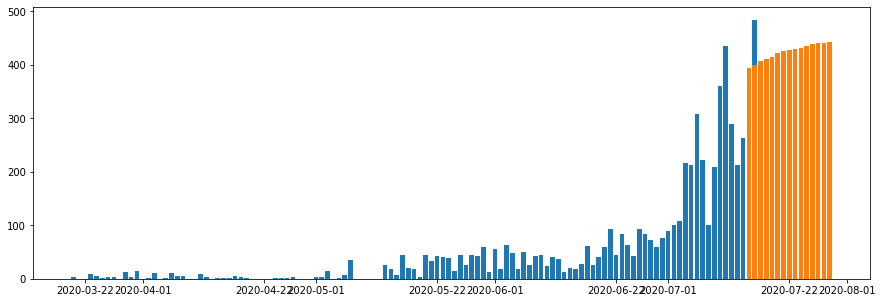

In [46]:
plt.figure(figsize=(15,5))
plt.bar(df_future.index,df_future['Confirmé'])
plt.bar(df_future.index,df_future['Predictions'])

In [29]:
18+16

34